This notebook tests out a tool for extracting a constellation of stars from Gaia DR2, and displaying them as a finder chart. 

In [1]:
from thefriendlystars.constellations.gaia import *

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


First, let's use Simbad to pull up some star by its name, to set the center for our finder chart.

In [2]:
# define the center of the search
center = get('GJ 1132')
print(center)

<SkyCoord (ICRS): (ra, dec) in deg
    (153.7162271, -47.1568464)>


Next, let's pull out the stars within 3 arcminutes of this center, and down to 20th magnitude.

In [3]:
# get constellation of stars surrounding that one
g = Gaia.from_cone(center, radius=3*u.arcmin, magnitudelimit=20)

SELECT source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',153.7162271,-47.1568464,0.05))=1 and phot_g_mean_mag < 20
querying Gaia DR2, centered on <SkyCoord (ICRS): (ra, dec) in deg
    (153.7162271, -47.1568464)> with radius 3.0 arcmin, for G<20
         [gaia] Gaia contains 374 objects


/Users/zkbt/anaconda3/envs/mosasaurus/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


This gives us access to all the Gaia DR2 coordinates through the `coordinates` attribute, as well as their `identifiers` and available `magnitudes`.

In [4]:
g.coordinates

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(153.68605688, -47.17713271, 2.90588788e+03),
     (153.67086762, -47.13925673, 2.59997499e+03),
     (153.6542645 , -47.1496036 , 1.00000000e+00),
     (153.69163988, -47.1488937 , 9.01870787e+02),
     (153.68803549, -47.17230933, 1.00000000e+00),
     (153.74941819, -47.1361324 , 1.15563435e+03),
     (153.71466434, -47.14362104, 2.69139034e+03),
     (153.76941393, -47.17812902, 1.41774295e+03),
     (153.74260212, -47.15972137, 8.54936461e+02),
     (153.75558843, -47.16066419, 1.20212652e+03),
     (153.78405229, -47.17419959, 5.36959090e+03),
     (153.71704239, -47.14250636, 3.72015475e+03),
     (153.71155976, -47.14152998, 1.69785558e+03),
     (153.69819578, -47.13311622, 6.43834964e+03),
     (153.69180378, -47.13012628, 1.00000000e+00),
     (153.74874219, -47.16827999, 1.00000000e+00),
     (153.66057262, -47.13710914, 2.00466322e+02),
     (153.69102524, -47.13722047, 2.43754128e+03),
     (153.75150519, -47.17

In [5]:
g.identifiers

DR2
int64
5413414609953081216
5413449931764216320
5413449901707934208
5413438180736560640
5413438077654393216
5413438421251873792
5413438219396897408
5413437218660917888
5413438047598204928


In [6]:
g.magnitudes

G,BP,RP
float32,float32,float32
18.55713,18.957989,18.015781
18.507736,19.151619,17.775295
19.241505,19.800808,18.566597
18.65556,19.710653,17.601328
18.738972,19.322521,17.986002
19.232082,19.817572,18.424105
17.841534,18.270988,17.273514
17.960821,18.782665,17.088469
13.196266,13.491957,12.740925


We can also pull out a nice summary table:

In [7]:
table = g.create_basic_table()
table

DR2,coordinates,G,BP,RP
,"deg,deg,pc",,,
int64,object,float32,float32,float32
5413414609953081216,"153.68605687667758,-47.177132707008475,2905.887880493593",18.55713,18.957989,18.015781
5413449931764216320,"153.670867619224,-47.1392567326113,2599.9749884591047",18.507736,19.151619,17.775295
5413449901707934208,"153.65426450053116,-47.14960359946944,1.0",19.241505,19.800808,18.566597
5413438180736560640,"153.69163987698283,-47.14889369817175,901.8707872579654",18.65556,19.710653,17.601328
5413438077654393216,"153.688035490815,-47.172309326701985,1.0",18.738972,19.322521,17.986002
5413438421251873792,"153.74941818692173,-47.13613240170601,1155.6343540996136",19.232082,19.817572,18.424105
5413438219396897408,"153.71466434104124,-47.14362104099114,2691.390335441922",17.841534,18.270988,17.273514
5413437218660917888,"153.76941393008124,-47.17812901598153,1417.7429503893268",17.960821,18.782665,17.088469


In [8]:
import astropy.table
astropy.table.Table(g.magnitudes)

G,BP,RP
float32,float32,float32
18.55713,18.957989,18.015781
18.507736,19.151619,17.775295
19.241505,19.800808,18.566597
18.65556,19.710653,17.601328
18.738972,19.322521,17.986002
19.232082,19.817572,18.424105
17.841534,18.270988,17.273514
17.960821,18.782665,17.088469
13.196266,13.491957,12.740925


From these, we could make color-magnitude diagrams, for example.

In [9]:
apparent = g.magnitudes['G']
ok = apparent < 18
absolute = apparent - 5*np.log10(g.coordinates.distance/(10*u.pc))
plt.scatter((g.magnitudes['BP'] - g.magnitudes['RP'])[ok], absolute[ok])
plt.ylim(plt.ylim()[::-1]); plt.xlabel(r'$BP-RP$'); plt.ylabel(r'$M_G$');

Let's make a plot!

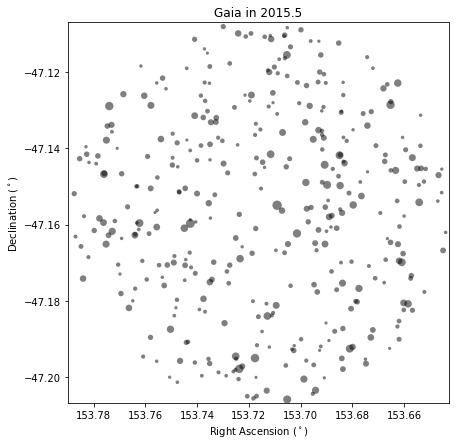

In [10]:
%matplotlib inline
g.finder();

Let's make a plot at some other epoch.

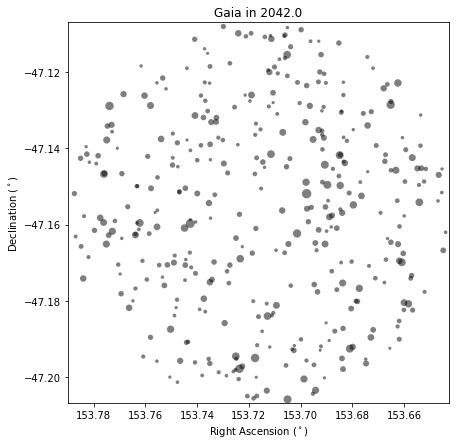

In [11]:
g.finder(2042);

Let's animate it!

100%|██████████| 41/41 [00:02<00:00, 17.82it/s]


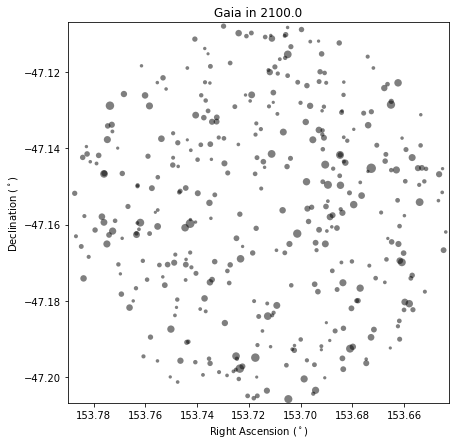

In [12]:
g.animate()

In [13]:
!open constellation.mp4

Let's try to look at the proper motions with red-blue glasses?

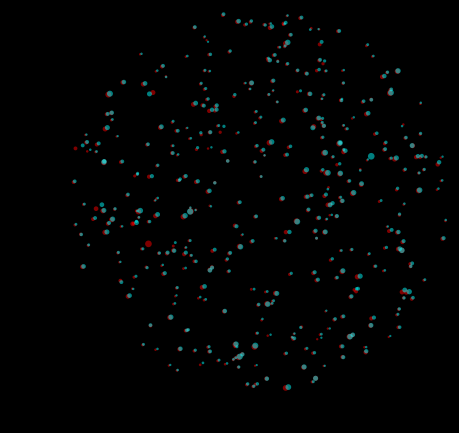

In [14]:
left, right = 1900, 2100
with plt.style.context('dark_background'):
    g.finder(left, color='red', alpha=0.5, sizescale=5)
    g.plot(right, color='cyan', alpha=0.5, sizescale=5)
    plt.axis('off')
    plt.title('')
    plt.savefig('3d-glasses.pdf')

In [15]:
!open 3d-glasses.pdf